In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Where mean fails

In [37]:
df = pd.DataFrame({
    'a':[9, 10, 10.5, 11, 9.5],
    'b':[1, 7, 10, 13, 19]
})
df

,a,b
0,9.0,1
1,10.0,7
2,10.5,10
3,11.0,13
4,9.5,19


In [38]:
np.mean(df['a'])

np.float64(10.0)

In [39]:
np.mean(df['b'])

np.float64(10.0)

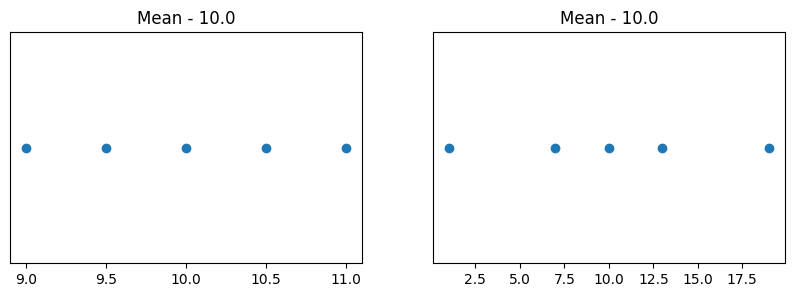

In [48]:
# Mean of the 2 lists are same, though thier spread around the mean is different
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.scatter(df['a'], [1,1,1,1,1], marker='o')
ax1.set_yticks([])

ax2.scatter(df['b'], [1,1,1,1,1], marker='o')
ax2.set_yticks([])

ax1.set_title("Mean - " + str(np.mean(df['a'])))
ax2.set_title("Mean - " + str(np.mean(df['b'])))

plt.show()

## Need for variance

In [46]:
np.var(df['a'])

0.5

In [47]:
np.var(df['b'])

36.0

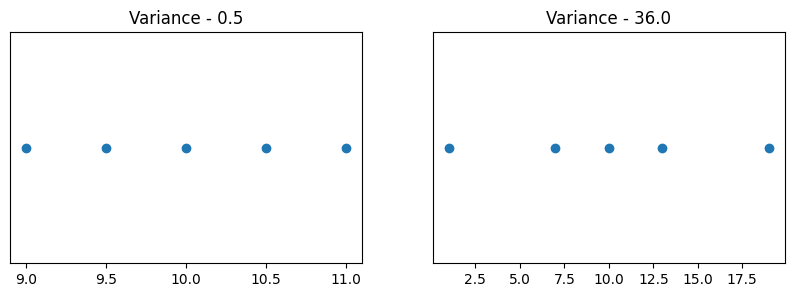

In [49]:
# Variance of plot 2 is higher than plot 1 since its spread is more
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.scatter(df['a'], [1,1,1,1,1], marker='o')
ax1.set_yticks([])

ax2.scatter(df['b'], [1,1,1,1,1], marker='o')
ax2.set_yticks([])

ax1.set_title("Variance - " + str(np.var(df['a'])))
ax2.set_title("Variance - " + str(np.var(df['b'])))

plt.show()

## Where Variance fails

In [53]:
df = pd.DataFrame({
    'x':[1, 2, 3, 4, 5],
    'y':[2, 4, 6, 8, 10],
    'z':[10, 8, 6, 4, 2]
})
df

,x,y,z
0,1,2,10
1,2,4,8
2,3,6,6
3,4,8,4
4,5,10,2


In [54]:
np.var(df['y'])

8.0

In [55]:
np.var(df['z'])

8.0

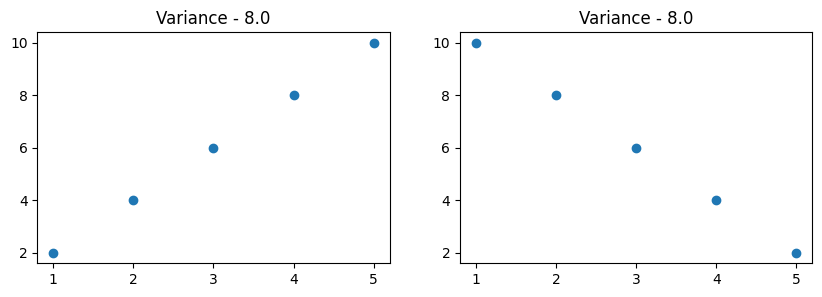

In [56]:
# Both plots are related differently with x, but show same variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.scatter(df['x'], df['y'])
ax2.scatter(df['x'], df['z'])

ax1.set_title("Variance - " + str(np.var(df['y'])))
ax2.set_title("Variance - " + str(np.var(df['z'])))

plt.show()

## Need for Covariance

In [57]:
np.cov(df['x'], df['y'])

array([[ 2.5,  5. ],
       [ 5. , 10. ]])

In [58]:
np.cov(df['x'], df['z'])

array([[ 2.5, -5. ],
       [-5. , 10. ]])

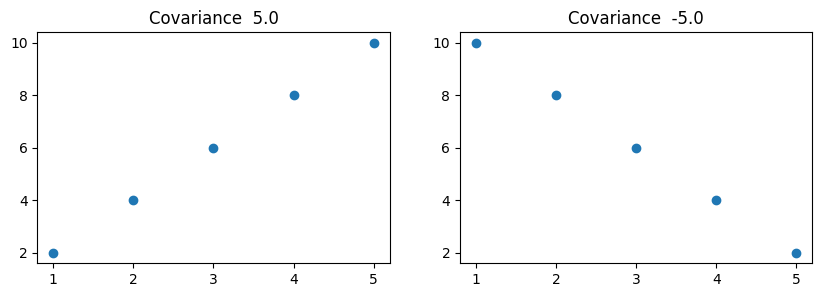

In [60]:
# Plot 1 shows +ve covariance while plot 2 shows -ve covariance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.scatter(df['x'], df['y'])
ax2.scatter(df['x'], df['z'])

ax1.set_title("Covariance  " + str(np.cov(df['x'], df['y'])[0,1]))
ax2.set_title("Covariance  " + str(np.cov(df['x'], df['z'])[0,1]))

plt.show()

## Where Covariance fails

In [5]:
df = pd.DataFrame({
    'x':[12,25,68,42,113],
    'y':[11,29,58,121,100]
})
df

,x,y
0,12,11
1,25,29
2,68,58
3,42,121
4,113,100


In [8]:
np.cov(df['x'], df['y'])

array([[1601.5 , 1148.75],
       [1148.75, 2153.7 ]])

Both plot 1 and plot 2 are same but plot 2 shows higher covariance due to larger scale


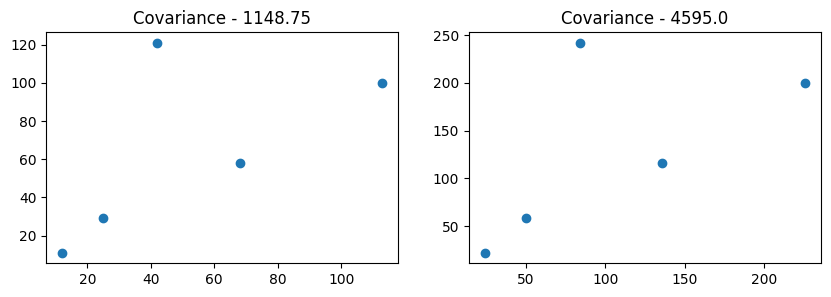

In [13]:
# Both plot 1 and plot 2 are same but plot 2 shows higher covariance due to larger scale
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.scatter(df['x'], df['y'])
ax2.scatter(df['x']*2, df['y']*2)

ax1.set_title("Covariance - " + str(np.cov(df['x'], df['y'])[0,1]))
ax2.set_title("Covariance - " + str(np.cov(df['x']*2, df['y']*2)[0,1]))

print("Both plot 1 and plot 2 are same but plot 2 shows higher covariance due to larger scale")
plt.show()

Plot 1 should show higher covariance due to proper linear relationship, but plot 3 is showing higher covariance due to larger scale


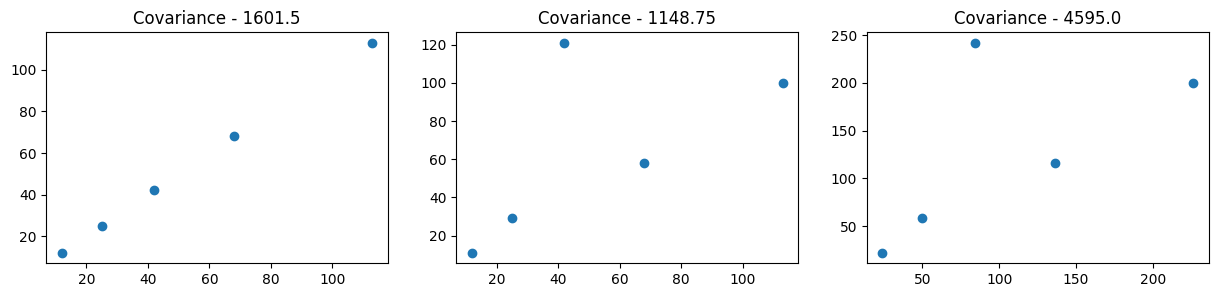

In [14]:
# Plot 1 should show higher covariance due to proper linear relationship, but plot 3 is showing higher covariance due to larger scale
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

ax1.scatter(df['x'], df['x'])
ax2.scatter(df['x'], df['y'])
ax3.scatter(df['x']*2, df['y']*2)

ax1.set_title("Covariance - " + str(np.cov(df['x'], df['x'])[0,1]))
ax2.set_title("Covariance - " + str(np.cov(df['x'], df['y'])[0,1]))
ax3.set_title("Covariance - " + str(np.cov(df['x']*2, df['y']*2)[0,1]))

print("Plot 1 should show higher covariance due to proper linear relationship, but plot 3 is showing higher covariance due to larger scale")
plt.show()

## Need for Correlation

In [15]:
df['x'].corr(df['y'])

np.float64(0.6185423626205997)

In [16]:
df['x'].corr(df['x'])

np.float64(1.0)

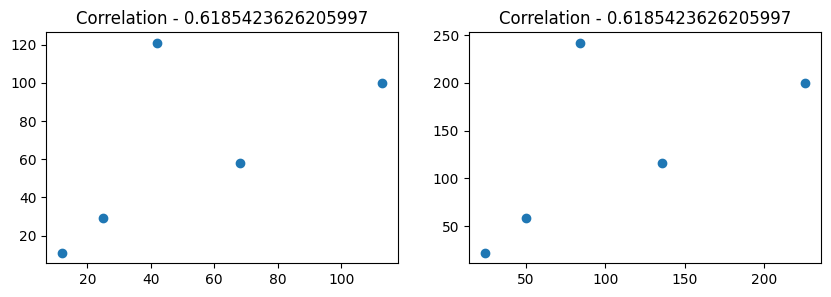

In [18]:
# Correlation is not affected by scale
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.scatter(df['x'], df['y'])
ax2.scatter(df['x']*2, df['y']*2)

ax1.set_title("Correlation - " + str(df['x'].corr(df['y'])))
ax2.set_title("Correlation - " + str((df['x']*2).corr(df['y']*2)))

plt.show()

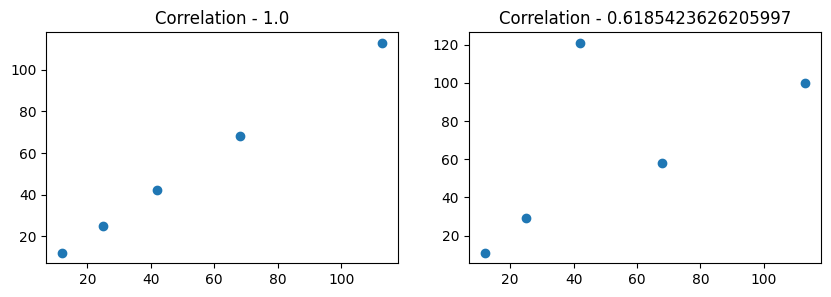

In [19]:
# Perfect linear relationship shows high correlation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.scatter(df['x'], df['x'])
ax2.scatter(df['x'], df['y'])

ax1.set_title("Correlation - " + str(df['x'].corr(df['x'])))
ax2.set_title("Correlation - " + str(df['x'].corr(df['y'])))

plt.show()

## Boxplot

In [66]:
data = [6, 213, 241, 260, 281, 290, 314, 321, 350, 1500]
n = len(data)

# 25th percentile
pos_Q1 = 0.25*(n + 1)        # 2.75
Q1 = 213 + 0.75*(241 - 213)  # 234
print("Q1 :- ", Q1)

# 50th percentile
pos_Q2 = 0.50*(n + 1)        # 5.5
Q2 = 281 + 0.50*(290 - 281)  # 285.5
print("Q2 :- ", Q2)

# 75th percentile
pos_Q3 = 0.75*(n + 1)        # 8.25
Q3 = 321 + 0.25*(350 - 321)  # 328.25
print("Q3 :- ", Q3)

# IQR
IQR = Q3-Q1
print("IQR :- ", IQR) #IQR :-  94.25

# Lower and upper bound
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print("Lower bound :- ", lower) # 92.625
print("Upper bound :- ", upper) #469.625

Q1 :-  234.0
Q2 :-  285.5
Q3 :-  328.25
IQR :-  94.25
Lower bound :-  92.625
Upper bound :-  469.625


<Axes: >

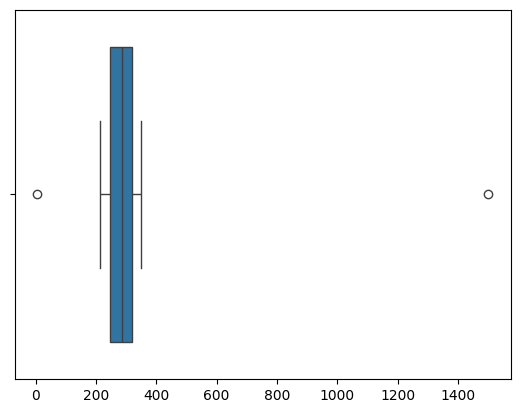

In [67]:
sns.boxplot(x=data)